In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd

Using TensorFlow backend.
C:\Users\darkr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\darkr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\darkr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\darkr\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
np.random.seed(10)

In [3]:
with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print(type(train_data))

<class 'dict'>


In [4]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32x32"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32x32"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimensions of the images are not 32x32"

In [6]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [7]:
import matplotlib.pyplot as plt
import random

num_of_samples = []
 
cols = 5
num_classes = 43
'''
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))
            

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
'''

'\nfig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))\nfig.tight_layout()\nfor i in range(cols):\n    for j, row in data.iterrows():\n        x_selected = X_train[y_train == j]\n        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))\n        axs[j][i].axis("off")\n        if i == 2:\n            axs[j][i].set_title(str(j) + "-" + row["SignName"])\n            num_of_samples.append(len(x_selected))\n            \n\nprint(num_of_samples)\nplt.figure(figsize=(12, 4))\nplt.bar(range(0, num_classes), num_of_samples)\nplt.title("Distribution of the training dataset")\nplt.xlabel("Class number")\nplt.ylabel("Number of images")\n'

(32, 32, 3)
36


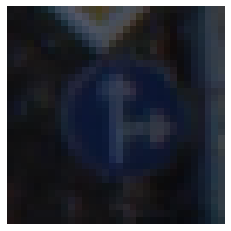

In [8]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [9]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

In [10]:
def equalize(img):
    img = cv2.equalizeHist(img) #Only grayscale imgs
    return img

In [11]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


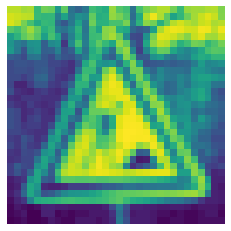

In [12]:
plt.imshow(X_train[random.randint(0, len(X_train - 1))])
plt.axis("off")
print(X_train.shape)

In [13]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [14]:
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [23]:
def leNet_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [24]:
model = modified_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 30)         

In [25]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), 
          batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 6s 172us/step - loss: 2.1453 - accuracy: 0.4173 - val_loss: 0.6207 - val_accuracy: 0.8029
Epoch 2/10
34799/34799 [==============================] - 6s 176us/step - loss: 0.4746 - accuracy: 0.8507 - val_loss: 0.2545 - val_accuracy: 0.9261
Epoch 3/10
34799/34799 [==============================] - 6s 173us/step - loss: 0.2530 - accuracy: 0.9201 - val_loss: 0.1720 - val_accuracy: 0.9517
Epoch 4/10
34799/34799 [==============================] - 6s 170us/step - loss: 0.1689 - accuracy: 0.9471 - val_loss: 0.1450 - val_accuracy: 0.9592
Epoch 5/10
34799/34799 [==============================] - 6s 171us/step - loss: 0.1311 - accuracy: 0.9600 - val_loss: 0.1280 - val_accuracy: 0.9635
Epoch 6/10
34799/34799 [==============================] - 6s 168us/step - loss: 0.1058 - accuracy: 0.9684 - val_loss: 0.1308 - val_accuracy: 0.9587
Epoch 7/10
34799/34799 [==============================] - 6s 17

Text(0.5, 0, 'epoch')

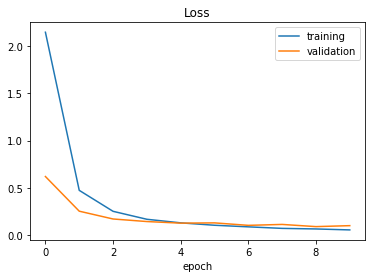

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score', score[0])
print('Test Accuracy', score[1])

Test Score 0.19419657787011665
Test Accuracy 0.9520189762115479
